In [2]:
# importy, przydatne funkcje

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

# np.vander(x, degree + 1)
# przyjmuje listę liczb x
# zwraca tabelę po zmianie zmiennych na wielomian stopnia x
# można sobie przetestować dla lepszego zrozumienia

def f(size):
    '''
    zwraca dwie listy przykładowych danych (x i y) o długości 'size'
    w tym wypadku przykładowa prawdziwa funkcja to y(x) = 2 * sin(1.5 * x)
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    zwraca dwie listy przykładowych danych (x i y) o długości 'size'
    podobnie jak f, ale z dodanym szumem
    uwaga - współrzędna x jest "losowana" z rozkładu jednostajnego
    (dla naszych zastosowań nie robi to większej różnicy, ale porządni informatycy
    mogą chcieć zastąpić linspace przez prawdziwe losowanie)
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + np.random.randn(x.size)
    return (x,y)

def fit_polynomial(x, y, degree):
    '''
    zwraca nauczony model regresji z wielomianową zmianą zmiennych
    (x,y): dane treningowe
    degree: stopień wielomianu
    '''
    # To juz umiemy sami zaimplementować!
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    zwraca predykcję nauczonego modelu regresji z wielomianową zmianą zmiennych
    x: dane do predykcji
    '''
    degree = model.coef_.size - 1 # wyciągamy stopień wielomianu z modelu
    y = model.predict(np.vander(x, degree + 1))
    return y


In [51]:

f_x, f_y = f(50)
x, y = sample(50)
model=fit_polynomial(x,y,4)
x=apply_polynomial(model,[23])
print x
x=x.item()
print x
[1]+[2,3]

[-11675.27297313]
-11675.2729731


[1, 2, 3]

[1.855738199408747, 1.1273347423627642, 1.0345012036406123, 0.051294371148602753, 0.046052031489602643, 0.013633897899644616, 0.0044594336760082499, 0.012301825608046053, 0.010068877825082978, 0.0092954563882901523, 0.0068120763083174777, 0.01184144682081071, 0.035254744881194011, 0.026333648694514745, 0.027686635363507902, 0.018712765189172864, 0.039114128615137564, 0.034080428046350739, 0.032956480631325828, 0.031005632393624447]
[0.0061562653433172524, 0.045046373860624003, 0.063263024240173577, 0.037160511342609323, 0.14263049422410201, 0.12822469676260706, 0.22638457597818235, 0.081690244880737561, 0.061520323766534643, 0.20839895449829926, 0.14967750235093055, 0.17947378038452397, 0.27260267091381918, 0.28517845655582635, 0.25966776763774141, 0.3040320825870263, 0.51301672838253343, 0.36273822117817978, 0.32334426568715346, 0.30118253745379037]


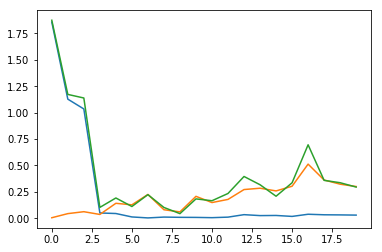

In [71]:
p=10 #liczba wielomianów 
f_x, f_y = f(50) #dane bez szumu na nich będziemy testować modele
bias_result=[]
variance_result=[]
mse_result=[]
for k in range(0,20):
    models=[]
    for j in range(0,p):#tworzymy tablice modeli
        x_learning,y_learning=sample(50)
        models+=[fit_polynomial(x_learning,y_learning,k)]
    main_model=models[0]
    array=[]
    for i in range(0,50):#liczymy wartość oczekiwaną modelu aproksymacji k wielomianami odpowiada to średniej z modeli 
        Ef_m=np.array([apply_polynomial(model,[f_x[i]]).item() for model in models])
        array+=[Ef_m.mean()]
    bias=(f_y-array)**2
    variance=(apply_polynomial(main_model,f_x)-array)**2
    mse=(apply_polynomial(main_model,f_x)-f_y)**2
    bias_result+=[bias.mean()]
    variance_result+=[variance.mean()]
    mse_result+=[mse.mean()]


plt.plot(range(0,20), bias_result)# niebieska krzywa oznacza bias^2
plt.plot(range(0,20), variance_result)#pomarańczowa variance 
plt.plot(range(0,20), mse_result)#zielona mse        

        

In [75]:
mse_result=np.array(mse_result)       
mse_result.argmin()
#Dla wielomianu 8 stopnia dostaliśmy najlepsze dopasowanie

8

Zadanie 3

Ze wzoru Bayesa mamy

$$p(\theta|X,y)=\alpha p(\theta|X)p(\theta|\mathbf{x_1},y_1)...p(\theta|\mathbf{x_n},y_n)$$

dalej mamy $y=f(x)+N(0,1)$ wiec
$$p(\theta|\mathbf{x},y)=\beta_1 exp(-\frac{1}{2}(y-f(x))^2)$$

a $p(\theta|X)=p(\theta)$, $\theta\text{~}N(0,\lambda^{-1})$ 
$$p(\theta)=\beta_2 exp(-\frac{\lambda}{2}||\theta||_2^2)$$

Podstawiając pod pierwszy wzór biorąc log 

$$log p(\theta|X,y)=A+\frac{-1}{2}\sum_{i}^{n}(y_i-f(\mathbf{x_i}))^2+\frac{-\lambda}{2}||\theta||_2^2$$

odejmując A oraz potem przemnarzac prawe wyrażenie przez $-2$ dostaniemy funkcje C. O ile odjęcie stałej nie zmieni miejsca extremum to przemnożenie przez $-2$ zmienni min na max i odwrotnie wiec będziemy poszukiwali min funkcji C


Niech C będzie zmieną losową dyskretną a c 

Mając dane jakiś $F_1,...,F_n$ zmienych danych zakładamy ,że są niezależne więc ze wzoru Bayesa dostajemy

$$P(C|F_1,...,F_n)=1/Z*P(C)*P(F_1)*...*P(F_n)\text{ gdzie Z jest wpółczynikiem skalowania niezależnym od thety}$$ 

Nasza estymacja będzie polegała na dla danego wektora $(x_1,...,x_n)$ będziemy poszukiwali takiego C, które zmaksymalizuje wyrażenie

$$P(C|F_1,...,F_n)=1/Z*P(C)*P(F_1=x_1|C)*...*P(F_n=x_n |C)$$

Jest to równoważne z 
    
$$argmax_C log(1/Z)+log(P(C=c))+log(P(F_1=x_1|C=c))+...+log(P(F_n=x_n |C=c))$$

By znaleść rozwiązanie wystarczy wybrać maksimum po wszyskich wartości zmiennej dyskretej C

Przyjmimy, że mamy dane $x_1,...,x_n$, które tworzą macierz $X$ i dla każdego wektora jest przypisanna liczby(etykiety) $y_i$, które razem tworzą wektor $y$. Przyjmimy także że mamy wektor parametrów $\theta$, który wpływa na prawdopodobieństwa obserwacji.Naive Bayes zakłada, że wszyskie zdarzenia są od siebie niezależne co pozwala nam zapisać

$$P(X|y,\theta)=P(x_1|y_1,\theta)*...*P(x_n|y_n,\theta)$$

Dalej korzystając ze wzoru Bayesa mamy

$$P(\theta|y,X)=1/Z*P(x_1|y_1,\theta)*...*P(x_n|y_n,\theta)\text{  ,gdzie jest liczbą Z zależną tylko macierzy } X$$

A więc będziemy poszukiwali, parametru $\theta$, który zmaksymalizuje likehood równy

$$L(\theta|y,X)=P(x_1|y_1,\theta)*...*P(x_n|y_n,\theta)$$

Przymimy teraz, że $x_i$ jest wektorem powstałym zawierającym 0 i 1 odpowiadające różnym próbą Bernuliego.Przymimy,że y może przyjmować k wartości.Każdemu z nich odpowiada kategoria $y_i$.Prawdopodobieństwo poszczególnej kategori jest równe 

$$L(x_1|y_k,\theta)=\theta_{1,k}^{x_1}(1-\theta_{1,k})^{1-x_1}*...*\theta_{n,k}^{x_n}*(1-\theta_{n,k})^{(1-x_n)}$$

Teraz należy podstawić ten wzór do Likehood i znaleść zestaw parametrów $\theta_{1,1},...,\theta_{n,1},...,\theta_{1,k},\theta_{n,k} $. Czyli potrzebujemy znaleść k*n parametrów.